# Traffic Signs Classification
**Sao Kanneh S3788996**

In [49]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from PIL import Image
import os
from glob import glob
import re
import numpy as np

In [56]:
# variables for training and testing path
datasetPath = 'datasets'
trainPath = os.path.join(datasetPath, 'train')
testPath = os.path.join(datasetPath, 'test')
shapes = ['diamond', 'hex', 'round', 'square', 'triangle']

Here I'm setting up a helper function to build a dataframe from paths. Because the training data is formatted in directories like so: <shape>/<type>

In [57]:
# creates dataframe using the provided path. returns the DataFrame with cos [path, shape, type]
def createTrainDfFromPath():
    print(f'trainPath: {trainPath}')
    train_signs_dict = {
        'path': [],
        'shape': [],
        'type': [],
        'pixels': [],
    }
    columns = ['path', 'shape', 'type', 'pixels']
    # loop through each shape, extract the relevant columns from their images
    for shape in shapes:
        shape_path = os.path.join(trainPath, f'{shape}/')
        print(f'adding images from {shape_path} to df')

        for imgPath in glob(f'{shape_path}/**/*.png', recursive=True):
            # use regex to get a list of directories in this path
            dir_list = re.findall('([a-zA-Z]+)', imgPath)
            im = Image.open(imgPath)
            # the sign-type is in the 3rd index
            sign_type = dir_list[3]
            train_signs_dict['path'].append(imgPath)
            train_signs_dict['shape'].append(shape)
            train_signs_dict['type'].append(sign_type)
            train_signs_dict['pixels'].append(np.asarray(im))
        print(f'{shape} added')

    return pd.DataFrame(train_signs_dict, columns=columns)

## EDA
In this section I will be exploring the images provided in the "train" subdirectory.

Before I can explore them though, I would like an easy way to manage their paths. the best way to do this is to add all image paths to a pandas DataFrame

In [58]:
tsigns2 = createTrainDfFromPath()

trainPath: datasets/train
adding images from datasets/train/diamond/ to df
diamond added
adding images from datasets/train/hex/ to df
hex added
adding images from datasets/train/round/ to df
round added
adding images from datasets/train/square/ to df
square added
adding images from datasets/train/triangle/ to df
triangle added


In [59]:
tsigns2.head()

,path,shape,type,pixels
0,datasets/train/diamond/rightofway/00039_00001.png,diamond,rightofway,"[[66, 67, 65, 66, 66, 65, 62, 59, 64, 66, 65, ..."
1,datasets/train/diamond/rightofway/01803_00002.png,diamond,rightofway,"[[58, 61, 60, 65, 75, 78, 81, 85, 83, 93, 97, ..."
2,datasets/train/diamond/rightofway/01702_00000.png,diamond,rightofway,"[[100, 102, 100, 101, 102, 100, 105, 104, 104,..."
3,datasets/train/diamond/rightofway/00111_00001.png,diamond,rightofway,"[[117, 133, 136, 105, 77, 126, 125, 92, 76, 11..."
4,datasets/train/diamond/rightofway/01231_00003.png,diamond,rightofway,"[[63, 74, 73, 45, 44, 45, 46, 46, 45, 44, 41, ..."


In [60]:
trafficSignsDf = createTrainDfFromPath()

trainPath: datasets/train
adding images from datasets/train/diamond/ to df
diamond added
adding images from datasets/train/hex/ to df
hex added
adding images from datasets/train/round/ to df
round added
adding images from datasets/train/square/ to df
square added
adding images from datasets/train/triangle/ to df
triangle added


In [61]:
trafficSignsDf.head()

,path,shape,type,pixels
0,datasets/train/diamond/rightofway/00039_00001.png,diamond,rightofway,"[[66, 67, 65, 66, 66, 65, 62, 59, 64, 66, 65, ..."
1,datasets/train/diamond/rightofway/01803_00002.png,diamond,rightofway,"[[58, 61, 60, 65, 75, 78, 81, 85, 83, 93, 97, ..."
2,datasets/train/diamond/rightofway/01702_00000.png,diamond,rightofway,"[[100, 102, 100, 101, 102, 100, 105, 104, 104,..."
3,datasets/train/diamond/rightofway/00111_00001.png,diamond,rightofway,"[[117, 133, 136, 105, 77, 126, 125, 92, 76, 11..."
4,datasets/train/diamond/rightofway/01231_00003.png,diamond,rightofway,"[[63, 74, 73, 45, 44, 45, 46, 46, 45, 44, 41, ..."


With the DF built, we can start looking at some of the images. We'll use PIL initially to display the images

In [62]:
pilIm = Image.open(trafficSignsDf['path'].iloc[0])
display(pilIm)

PIL seems to display them in a very small format, matplotlib may work best instead:

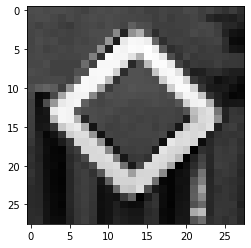

In [63]:
img = mpimg.imread(trafficSignsDf['path'].iloc[0])
imgplot = plt.imshow(img, cmap="gray")
plt.show()

As suspected, matplotlib gives a much better view that is scaled for visibility. Now we explore the images with confidence.

We'll start by looking at descriptive stats of our DF

In [64]:
trafficSignsDf.describe()

,path,shape,type,pixels
count,3699,3699,3699,3699
unique,3699,5,16,3699
top,datasets/train/square/parking/00080_00000.png,round,warning,"[[56, 53, 49, 43, 40, 43, 43, 40, 43, 47, 45, ..."
freq,1,1760,695,1


The value count of shapes:

In [17]:
trafficSignsDf['shape'].value_counts()

round      1760
square      688
diamond     282
hex          43
Name: shape, dtype: int64

and a plot of the value counts:

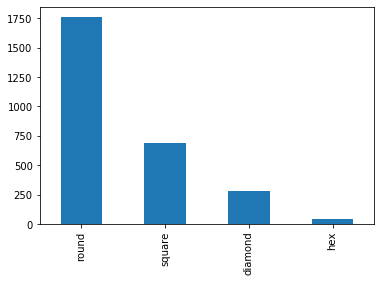

In [18]:
trafficSignsDf['shape'].value_counts().plot(kind='bar')

Observations:
* Most frequent shape in the dataset is the "round" shape with 1760 instances
* Hex is the lest frequent shape in the dataset with 43 instances

The above observations indicate a class imbalance. Because of this, accuracy may not be a good performance metric for the model that predicts shape.

And we repeat the same for sign-type (type in the DF)

In [19]:
trafficSignsDf['type'].value_counts()

noentry             375
speed               316
bicycle             285
rightofway          282
parking             276
noparking           242
continue            199
trafficdirective    195
limitedtraffic      125
traveldirection     124
laneend             118
roundabout           98
crossing             95
stop                 43
Name: type, dtype: int64

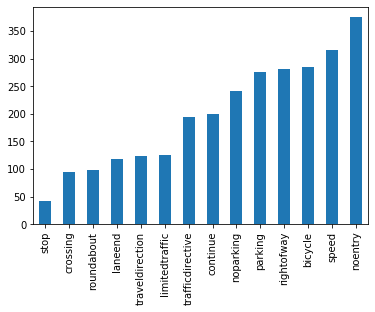

In [33]:
trafficSignsDf['type'].value_counts(ascending=True).plot(kind='bar')

Observations:
* 'noentry' is the most frequent value in the type column with 375 instances
* 'stop' is the least frequent value with 43 instances

Accuracy may not be the best performance metric due to the imbalanced classes. We may want to choose F2 or Average Precision as our performance metrics. A final decision can be made after some additional exploration

In [80]:
diamondDf = trafficSignsDf.loc[trafficSignsDf['shape'] == 'diamond']
hexDf = trafficSignsDf.loc[trafficSignsDf['shape'] == 'hex']
roundDf = trafficSignsDf.loc[trafficSignsDf['shape'] == 'round']
squareDf = trafficSignsDf.loc[trafficSignsDf['shape'] == 'square']
triangleDf = trafficSignsDf.loc[trafficSignsDf['shape'] == 'hex']
shapesDfs = []
for shapes in shapes:
    shapesDfs.append(trafficSignsDf.loc[trafficSignsDf['shape'] == shapes])
shapeDfList = [diamondDf, hexDf, roundDf, squareDf, triangleDf]

In [81]:
hexDf.head()

,path,shape,type,pixels
282,datasets/train/hex/stop/01951_00002.png,hex,stop,"[[33, 25, 23, 24, 23, 42, 33, 23, 27, 28, 31, ..."
283,datasets/train/hex/stop/01951_00001.png,hex,stop,"[[35, 27, 21, 20, 24, 29, 32, 33, 31, 27, 27, ..."
284,datasets/train/hex/stop/01951_00000.png,hex,stop,"[[29, 25, 27, 38, 53, 41, 46, 45, 75, 209, 211..."
285,datasets/train/hex/stop/01920_00000.png,hex,stop,"[[69, 70, 68, 67, 64, 63, 59, 59, 54, 55, 59, ..."
286,datasets/train/hex/stop/01811_00002.png,hex,stop,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [82]:
shapesDfs[1].head()

,path,shape,type,pixels
282,datasets/train/hex/stop/01951_00002.png,hex,stop,"[[33, 25, 23, 24, 23, 42, 33, 23, 27, 28, 31, ..."
283,datasets/train/hex/stop/01951_00001.png,hex,stop,"[[35, 27, 21, 20, 24, 29, 32, 33, 31, 27, 27, ..."
284,datasets/train/hex/stop/01951_00000.png,hex,stop,"[[29, 25, 27, 38, 53, 41, 46, 45, 75, 209, 211..."
285,datasets/train/hex/stop/01920_00000.png,hex,stop,"[[69, 70, 68, 67, 64, 63, 59, 59, 54, 55, 59, ..."
286,datasets/train/hex/stop/01811_00002.png,hex,stop,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [79]:
diamondDf.head()

,path,shape,type
0,datasets/train/diamond/rightofway/00039_00001.png,diamond,rightofway
1,datasets/train/diamond/rightofway/01803_00002.png,diamond,rightofway
2,datasets/train/diamond/rightofway/01702_00000.png,diamond,rightofway
3,datasets/train/diamond/rightofway/00111_00001.png,diamond,rightofway
4,datasets/train/diamond/rightofway/01231_00003.png,diamond,rightofway


In [98]:
def showImagesFromDfList(n = 5):
    df_count = 1

    for df in shapesDfs:
        plt.subplot(5,n,df_count)
        for index, row in df.head(n).iterrows():
            df_count = df_count + 1 if df_count < n else 1
            # shapeImg = mpimg.imread(row['pixels'])
            plt.imshow(row['pixels'], cmap="gray")
            plt.show()

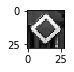

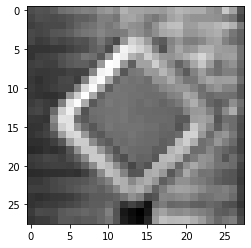

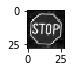

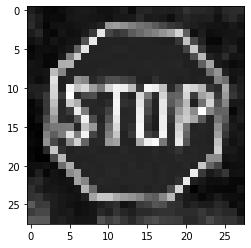

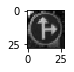

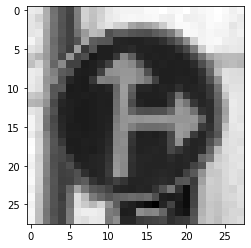

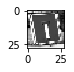

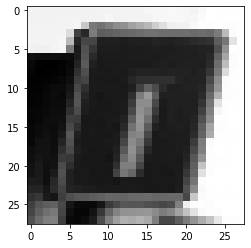

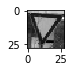

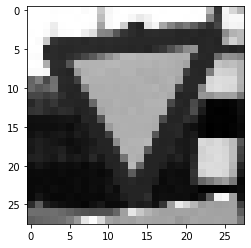

In [99]:
showImagesFromDfList(2)